In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression 

### Create Data

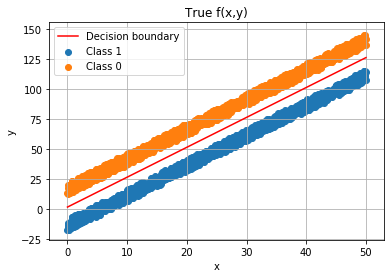

Original X.shape: (2000, 1)
X.shape after adding the labels: (2000, 2)
y.shape for the labels: (2000, 1)


In [18]:
xstart=0
xstop = 50
Npoints = 1000
x = np.linspace(xstart,xstop,Npoints).reshape(Npoints,1)
# mTrue = np.random.randn(1)
# cTrue = np.random.randn(1)
mTrue = 2.5
cTrue = 1.5

yTrue = mTrue*x+cTrue
noiseAmp = 10
bias = -20
yNoisyUpper = yTrue+noiseAmp*np.random.random(Npoints).reshape(Npoints,1)+bias
yNoisyLower = yTrue-noiseAmp*np.random.random(Npoints).reshape(Npoints,1)-bias
yNoisy = np.concatenate((yNoisyLower,yNoisyUpper),axis=0)
plt.scatter(x,yNoisyUpper,label='Class 1')
plt.scatter(x,yNoisyLower,label='Class 0')

plt.plot(x,yTrue,'r-',label='Decision boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True f(x,y)')
plt.legend()
plt.grid(True)
plt.show()
X = np.concatenate((x,x),axis=0)
print(f"Original X.shape: {X.shape}")
X = np.concatenate((X,yNoisy),axis=1)
print(f"X.shape after adding the labels: {X.shape}")
y = np.concatenate((np.zeros((Npoints,1)),np.ones((Npoints,1))),axis=0)
print(f"y.shape for the labels: {y.shape}")

In [ ]:
def sigma(z):
    '''Computes the sigmoid for a numpy array z
    '''
    return 1/(1+np.exp(-z))

In [ ]:
def computeGradient(x,y,z):
    '''Computes the gradient for the cross entropy loss function. x,y are (n,) numPy arrays, signifying the 2 features.
       z =  theta0+theta1x+theta2y is an (n,) numPy array. Returns the (3,) gradient at the current iteration.
    '''
    n = x.shape[0]
    sigma_z = sigma(z)
#     print(f"sigma_z: {sigma_z}")
#     print(f"sigma_z.shape: {sigma_z.shape}")
#     estimation_error = (y/sigma_z)-((1-y)/(1-sigma_z))
    estimation_error = sigma_z-y
    term1 = sum(sigma_z*(1-sigma_z)*estimation_error)
    term2 = sum(x*sigma_z*(1-sigma_z)*estimation_error)
    term3 = sum(y*sigma_z*(1-sigma_z)*estimation_error)
    return (np.array([term1,term2,term3]))/n
    
    

In [ ]:
def GradientDescent(X,y,start,step_size,tolerance,Niter):    
    ''' Will perform gradient descent on X (nx2), using target y (nx1) 
    '''    
    gradNorm = 10000
    i = 0
    current_theta_estimate = start
    norms = []
    n = X.shape[0]            
    while i<Niter and gradNorm > tolerance:        
        z_estimate = current_theta_estimate[0]+current_theta_estimate[1]*X[:,0] + current_theta_estimate[2]*X[:,1]
#         print(f"z_estimate.shape = {z_estimate.shape}")
#         print(f"z_estimate = {z_estimate}")
        grad = computeGradient(X[:,0],X[:,1],z_estimate)
#         print(f"grad = {grad}")
        gradNorm = np.linalg.norm(grad)
        norms.append(gradNorm)        
        current_theta_estimate = current_theta_estimate - step_size*grad
        i+=1
    plt.plot(np.array(list(range(1,i+1))),norms)
    plt.xlabel('Iterations')
    plt.ylabel('||gradient||')
    plt.grid(True)
    plt.title("Convergence of gradient descent")
    print(f"Started at location {start}")
    print(f"Finished with {i} iterations")
    print(f"Finished with gradient norm = {gradNorm}")
    print(f"Finished at location {current_theta_estimate}")
    return current_theta_estimate
    

In [ ]:
def VanillaLogisticRegression(X,y):    
    '''Assumes that the input matrix is an nx2 numPy array with n observations and y is an nx1 target vector 
    '''
    n = X.shape[0]
    theta_estimate_start = np.random.rand(3)
    theta_estimate_start = np.array([-cTrue,mTrue,1])
    learning_rate = 1e-6
    err_tolerance = 1e-6
    MaxIter = 1000
    estimated_coeff = GradientDescent(X,y,theta_estimate_start,learning_rate,err_tolerance,MaxIter)
    return estimated_coeff

    
    
    

    
    

Started at location [-1.5  2.5  1. ]
Finished with 1000 iterations
Finished with gradient norm = 0.006429355181319465
Finished at location [-1.50000143  2.49999781  1.00000587]
theta estimated [ theta0,theta1, theta2]: [-1.50000143  2.49999781  1.00000587]
Slope estimated : 2.499983124637193
Original slope : 2.5
Intercept estimated : 1.4999926149639653
Original intercept : 1.5
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Sum error: 392.0
Error probability : 0.196


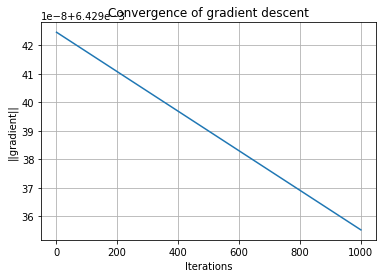

In [16]:
y=y.reshape(2000,)
theta_est = VanillaLogisticRegression(X,y)
print(f"theta estimated [ theta0,theta1, theta2]: {theta_est}")
m_est  = theta_est[1]/theta_est[2]
c_est = -theta_est[0]/theta_est[2]
y_decision_boundary = m_est*X[:,0] -c_est
print(f"Slope estimated : {m_est}")
print(f"Original slope : {mTrue}")
print(f"Intercept estimated : {c_est}")
print(f"Original intercept : {cTrue}")
y_pred_algo = list(map(lambda q: 0 if q<0 else 1,X[:,1]-y_decision_boundary))
print(y_pred_algo[Npoints-5:Npoints+6])
sumErr = sum(abs(y_pred_algo-y))
print(f"Sum error: {sumErr}")
errRate = sumErr/(2*Npoints)
print(f"Error probability : {errRate}")


In [11]:
logReg = LogisticRegression()

In [12]:
logReg.fit(X,y)
# print(X.shape)
# print(y.shape)
# X : {array-like, sparse matrix}, shape (n_samples, n_features)
#     Training vector, where n_samples is the number of samples and
#     n_features is the number of features.

# y : array-like, shape (n_samples,)
#     Target vector relative to X. 


C:\Users\saurmisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = logReg.predict(X)
y_pred = logReg.predict(X)
prob_pred = logReg.predict_proba(X)
print("Predictions change at this point!")
print(y_pred[Npoints-3:Npoints+3])
print("Prediction Probabilities change at this point!")
print(prob_pred[Npoints-3:Npoints+3,:])
theta_est_skl = np.concatenate((np.array([logReg.intercept_]),logReg.coef_),axis=1)
print("Estimated Coefficients:[theta0,theta1,theta2] : ")
print(theta_est_skl)
m_est_skl  = -theta_est_skl[0,1]/theta_est_skl[0,2]
c_est_skl = -theta_est_skl[0,0]/theta_est_skl[0,2]
print(f"Slope estimated : {m_est_skl}")
print(f"Original slope : {mTrue}")
print(f"Intercept estimated : {c_est_skl}")
print(f"Original intercept : {cTrue}")
y_decision_boundary_est = m_est_skl*x + c_est_skl

Predictions change at this point!
[0. 0. 0. 1. 1. 1.]
Prediction Probabilities change at this point!
[[9.99995938e-01 4.06237420e-06]
 [9.99929469e-01 7.05314677e-05]
 [9.99996094e-01 3.90593689e-06]
 [1.24086584e-06 9.99998759e-01]
 [9.60709027e-05 9.99903929e-01]
 [5.86315523e-06 9.99994137e-01]]
Estimated Coefficients:[theta0,theta1,theta2] : 
[[-0.0928818  -1.66790126  0.65827048]]
Slope estimated : 2.533762828759853
Original slope : 2.5
Intercept estimated : 0.14109975758143
Original intercept : 1.5


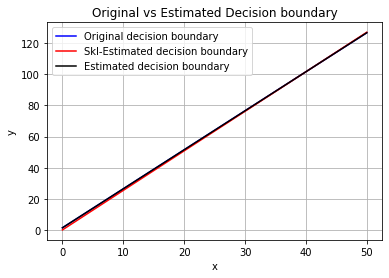

In [17]:
y_decision_boundary = m_est*x + c_est
plt.plot(x,yTrue,'b-',label='Original decision boundary')
plt.plot(x,y_decision_boundary_est,'r-',label='Skl-Estimated decision boundary')
plt.plot(x,y_decision_boundary,'k-',label='Estimated decision boundary')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original vs Estimated Decision boundary')
plt.grid(True)
plt.show()